# Emulating using GPs


In [1]:
import os
## Ignore my broken HDF5 install...
os.putenv("HDF5_DISABLE_VERSION_CHECK", '1')

In [2]:
import iris
from utils import get_bc_ppe_data

from esem import gp_model
from esem.utils import get_random_params

import iris.quickplot as qplt
import matplotlib.pyplot as plt
%matplotlib inline

## Read in the parameters and observables

In [3]:
ppe_params, ppe_aaod = get_bc_ppe_data()

In [4]:
n_test = 5

X_test, X_train = ppe_params[:n_test], ppe_params[n_test:]
Y_test, Y_train = ppe_aaod[:n_test,0], ppe_aaod[n_test:,0]

## Setup and run the models

In [5]:
model = gp_model(X_train, Y_train)

In [6]:
model.train()

In [7]:
m, v = model.predict(X_test.values)

In [8]:
## validation_plot(Y_test.data.flatten(), m.data.flatten(), v.data.flatten())

/net/n2o/wolke/proskeu/conda/envs/esem/lib/python3.7/site-packages/iris/coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'sample'.
  warnings.warn(msg.format(self.name()))
/net/n2o/wolke/proskeu/conda/envs/esem/lib/python3.7/site-packages/iris/coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'job'.
  warnings.warn(msg.format(self.name()))
/net/n2o/wolke/proskeu/conda/envs/esem/lib/python3.7/site-packages/iris/coords.py:1193: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))
/net/n2o/wolke/proskeu/conda/envs/esem/lib/python3.7/site-packages/iris/coords.py:1193: UserWarning: Coordinate 'latitude' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))


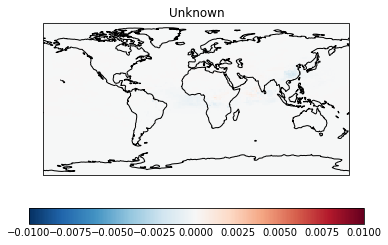

In [9]:
qplt.pcolormesh((m.collapsed('sample', iris.analysis.MEAN)-Y_test.collapsed('job', iris.analysis.MEAN)), cmap='RdBu_r', vmin=-0.01, vmax=0.01)
plt.gca().coastlines()

In [10]:
## Note the model variance is constant across the outputs
v.data.max()

1.135653859818082e-06

In [11]:
get_random_params(3, int(1e5)).shape

(100000, 3)

In [12]:
m, sd = model.batch_stats(get_random_params(3, int(1e3)))

100%|##########| 1000/1000 [00:04<00:00, 144.07sample/s]

In [13]:
m, sd = model.batch_stats(get_random_params(3, int(1e4)), batch_size=10)

100%|##########| 10000/10000 [00:03<00:00, 3506.51sample/s]

In [14]:
#m, sd = model.batch_stats(get_random_params(3, int(1e6)), batch_size=10000)

# Validation following Bastos and O'Hagan

In [16]:
m_test, v_test = model.predict(X_test.values)

Proportion of 'Bad' estimates : 1.43%


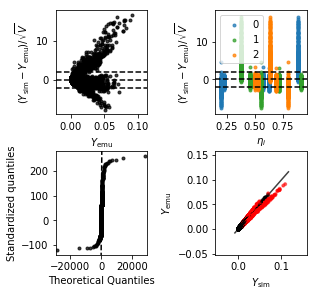

In [17]:
validation_plot_bastos(X_test, Y_test.data, m_test.data, v_test.data)

This validation result indicates that there is a problem with the emulation in the space where the emulator is giving high predictions (top left plot, compare Fig. 1a in Bastos and O'Hagan (2009).